In [58]:
import pandas as pd
import numpy as np 
import torch 
import torchvision.models as models
from torchvision import datasets, transforms
from torch import nn
from PIL import Image
import helper
from tqdm import tqdm
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

In [3]:
resnet = models.resnet34(pretrained=True)

In [83]:
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [97]:
path = '/dlabdata1/lugeon/websites_alexa_mp2_468_16cat_screenshots/'

In [98]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

transform = transforms.Compose([transforms.ToTensor(), normalize])

In [99]:
data = datasets.ImageFolder(path, transform=transform)

In [100]:
bs = 10

dataloader = torch.utils.data.DataLoader(data,
                                         batch_size=bs,
                                         shuffle=False,
                                         num_workers=10)


In [101]:
class Webnet(nn.Module):
    def __init__(self):
        super(Webnet, self).__init__()
        
        resnet = models.resnet34(pretrained=True)
        self.resnet_trunc = torch.nn.Sequential(*list(resnet.children())[:-1])
        
        self.final = torch.nn.Sequential(self.resnet_trunc, torch.nn.Linear(512,16))
        
    def forward(self, x):
        return self.resnet_trunc(x)

In [102]:
model = Webnet()
outdim = 512

outputs = torch.FloatTensor()
targets = torch.IntTensor()

model.eval()

torch.set_num_threads(24)

with torch.no_grad():

    for input, target in tqdm(iter(dataloader)):
        outputs = torch.cat((outputs, model(input).reshape(len(target), outdim)), 0)
        targets = torch.cat((targets, target.reshape(len(target), 1)), 0)

100%|██████████| 443/443 [20:55<00:00,  2.83s/it]


In [103]:
x_tsne = TSNE(n_components=2, random_state=42).fit_transform(outputs)

In [128]:
(targets == 0).flatten()

tensor([ True,  True,  True,  ..., False, False, False])

In [130]:
x_tsne[(targets == 0).flatten(), :].shape

(290, 2)

In [115]:
x_tsne[:20]

array([[-41.066372  , -38.774353  ],
       [-50.291058  , -21.780508  ],
       [ 44.256382  ,   1.0733429 ],
       [-50.164753  , -22.418772  ],
       [  9.459592  , -17.69179   ],
       [-29.072205  ,   4.2893147 ],
       [ 44.25164   ,   0.92209136],
       [ 11.738787  , -48.94032   ],
       [ 43.658367  ,   0.8329983 ],
       [-33.04337   ,  -7.47394   ],
       [ 13.336017  ,  -2.461105  ],
       [ 20.5876    ,   0.65683293],
       [-40.55449   , -28.262197  ],
       [ 35.65635   ,  26.269703  ],
       [-10.793834  , -21.15695   ],
       [ 37.403362  ,  -0.8600992 ],
       [-23.892351  ,  24.347466  ],
       [ -2.1505213 ,  11.001069  ],
       [-40.842133  , -11.389446  ],
       [ -9.861131  ,  50.976383  ]], dtype=float32)

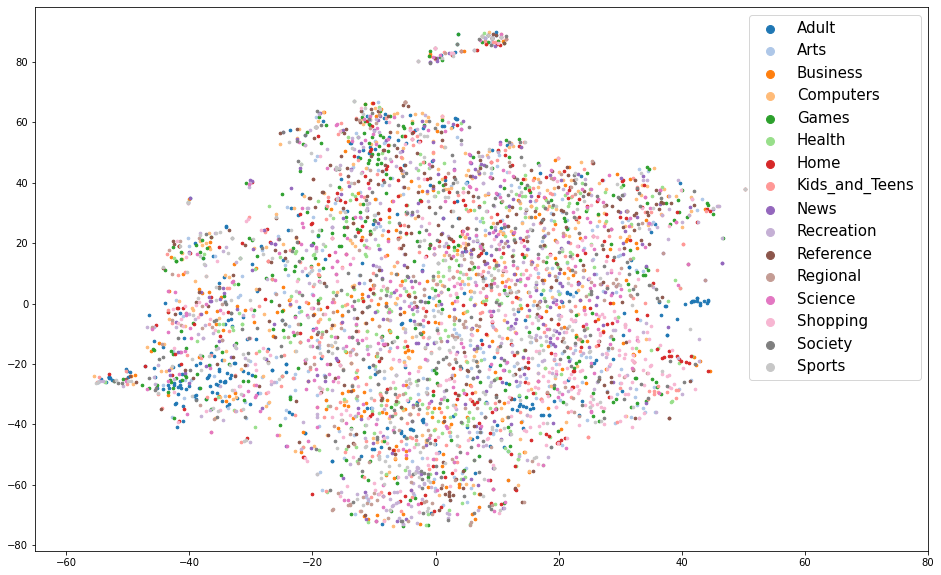

In [142]:
colormap = plt.get_cmap('tab20')

opacity = 1
marker_size = 7
marker = 'o'

fig, ax = plt.subplots(figsize=(16, 10))

for label, i in data.class_to_idx.items():
    mask = (targets == i).flatten()
    points = x_tsne[mask, :]
    
    plt.scatter(points[:, 0], points[:, 1], color=colormap(i), marker=marker, s=marker_size, label=label)

ax.set_xlim([-65,80])
#ax.set_ylim([0,1])

#ax.set_xticks([], [])
#ax.set_yticks([], [])
    
#plt.title('t-SNE decomposition of description content in meta tags')
plt.legend(markerscale=3, fontsize=15)
plt.plot();

In [143]:
ix = []

for i in range(len(x_tsne)):
    if x_tsne[i, 1] >= 80:
        ix += [i]

In [144]:
ix

[98,
 99,
 114,
 129,
 145,
 176,
 183,
 219,
 276,
 286,
 403,
 486,
 494,
 609,
 642,
 715,
 762,
 916,
 934,
 954,
 1015,
 1029,
 1042,
 1074,
 1077,
 1148,
 1153,
 1168,
 1192,
 1210,
 1261,
 1262,
 1298,
 1341,
 1374,
 1378,
 1492,
 1573,
 1701,
 1739,
 1761,
 1805,
 1808,
 1926,
 1931,
 1945,
 1973,
 1994,
 2028,
 2056,
 2064,
 2194,
 2209,
 2243,
 2277,
 2298,
 2333,
 2361,
 2388,
 2425,
 2429,
 2488,
 2640,
 2656,
 2688,
 2808,
 2809,
 2831,
 2929,
 3009,
 3055,
 3096,
 3194,
 3238,
 3273,
 3449,
 3459,
 3476,
 3526,
 3537,
 3603,
 3667,
 3668,
 3678,
 3770,
 3794,
 3864,
 3914,
 4000,
 4131,
 4166,
 4206,
 4219,
 4235,
 4252,
 4261,
 4268,
 4320,
 4327,
 4381,
 4388]

In [145]:
for i in ix:
    print(dataloader.dataset.samples[i][0])

/dlabdata1/lugeon/websites_alexa_mp2_468_16cat_screenshots/Adult/254.jpeg
/dlabdata1/lugeon/websites_alexa_mp2_468_16cat_screenshots/Adult/255.jpeg
/dlabdata1/lugeon/websites_alexa_mp2_468_16cat_screenshots/Adult/279.jpeg
/dlabdata1/lugeon/websites_alexa_mp2_468_16cat_screenshots/Adult/298.jpeg
/dlabdata1/lugeon/websites_alexa_mp2_468_16cat_screenshots/Adult/312.jpeg
/dlabdata1/lugeon/websites_alexa_mp2_468_16cat_screenshots/Adult/360.jpeg
/dlabdata1/lugeon/websites_alexa_mp2_468_16cat_screenshots/Adult/374.jpeg
/dlabdata1/lugeon/websites_alexa_mp2_468_16cat_screenshots/Adult/427.jpeg
/dlabdata1/lugeon/websites_alexa_mp2_468_16cat_screenshots/Adult/85.jpeg
/dlabdata1/lugeon/websites_alexa_mp2_468_16cat_screenshots/Adult/96.jpeg
/dlabdata1/lugeon/websites_alexa_mp2_468_16cat_screenshots/Arts/1658.jpeg
/dlabdata1/lugeon/websites_alexa_mp2_468_16cat_screenshots/Arts/588.jpeg
/dlabdata1/lugeon/websites_alexa_mp2_468_16cat_screenshots/Arts/622.jpeg
/dlabdata1/lugeon/websites_alexa_mp2_468_1